# Context

- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.


**Labels**

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)

X_train : (60000, 28, 28)
X_test :  (10000, 28, 28)
y_train :  (60000,)
y_test :  (10000,)


- There are 60 000 images in the training dataset, each one has 28 pixels in height and 28 in width.
- There are 10 000 images in the testing dataset, each one has 28 pixels in height and 28 in width.

#  STEP #2: VISUALIZE DATA

Let's visualize one random image :

Label : 7


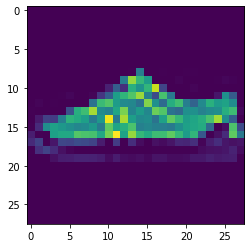

In [4]:
n = np.random.randint(500)
print('Label :', y_train[n])
plt.imshow(X_train[n]);

**Let's visualize random images and their classes :**

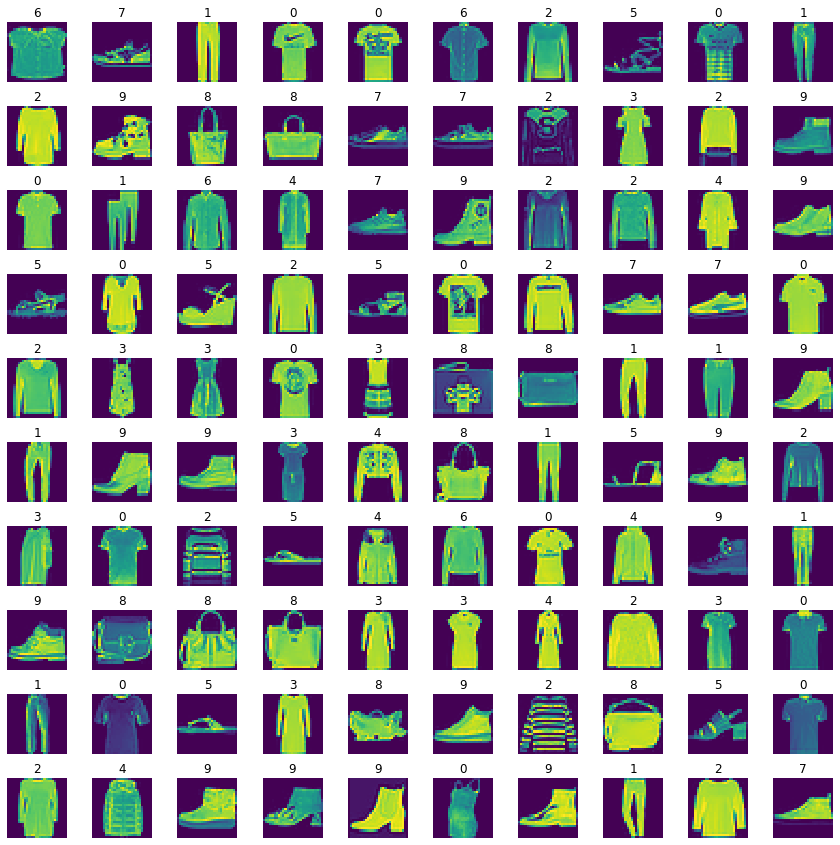

In [5]:
L_grid = 10
H_grid = 10

fig, axes = plt.subplots(L_grid, H_grid , figsize = (15,15))
axes = axes.ravel()


for i in np.arange(0, L_grid *H_grid):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

**Let's display an image of each class :**

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

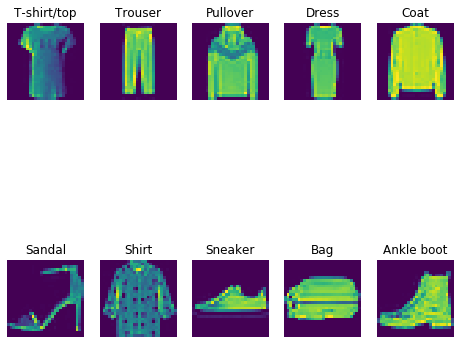

In [7]:
fig,axes = plt.subplots(2 , 5 , figsize = (8,8))
axes = axes.ravel()

for i in np.arange(0,10) :
    random_image = np.random.randint(100)
    mask = y_train == i
    axes[i].imshow(X_train[mask][random_image])
    axes[i].set_title(class_names[i])
    axes[i].axis('off')
           

# STEP #3: DATA PREPARATION

- Let's change X type into floats and normalize the data by dividing by 255.
- As a reminder, this dataset contains images with no color, in grey. Each pixel is ranged between 0 and 255.

In [8]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)

X_train : (60000, 28, 28)
X_test :  (10000, 28, 28)
y_train :  (60000,)
y_test :  (10000,)


In [9]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [10]:
X_train, X_test = X_train / 255,  X_test /255

The data is only 2D (28 x 28).
But convolution expects height x width x color

In [11]:

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [12]:
num_cat = len(set(y_train.flatten()))
print('Number of classes :', num_cat)
print('Classes :' , set(y_train.flatten()))

Number of classes : 10
Classes : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [13]:
import tensorflow.keras
y_train = tensorflow.keras.utils.to_categorical(y_train, num_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test = tensorflow.keras.utils.to_categorical(y_test, num_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)

X_train : (60000, 28, 28, 1)
X_test :  (10000, 28, 28, 1)
y_train :  (60000, 10)
y_test :  (10000, 10)


# STEP #4: TRAIN THE MODEL

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import TensorBoard

In [17]:
Input_shape = X_train.shape[1 :]
Input_shape

(28, 28, 1)

**We will use :**
- **Batch Normalization** layers in order to higher learning rates and reduce the strong dependance on initialization
- **Dropout technique** to prevent overfitting the training data. It forces the model to avoid relying too much on particular sets of features.

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = Input_shape))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = Input_shape))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Conv2D (filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same') )
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D (filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same') )
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))



In [19]:
cnn_model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'Adam',
                 metrics = 'accuracy')

In [20]:
r = cnn_model.fit(X_train, y_train, epochs = 7, batch_size = 32 )

Epoch 1/10
1875/1875 [==============================] - 363s 194ms/step - loss: 0.3784 - accuracy: 0.8655
Epoch 2/10
1875/1875 [==============================] - 3316s 2s/step - loss: 0.2429 - accuracy: 0.9118
Epoch 3/10
1875/1875 [==============================] - 385s 205ms/step - loss: 0.2084 - accuracy: 0.9238
Epoch 4/10
1875/1875 [==============================] - 299s 159ms/step - loss: 0.1842 - accuracy: 0.9336
Epoch 5/10
1875/1875 [==============================] - 315s 168ms/step - loss: 0.1611 - accuracy: 0.9407
Epoch 6/10
1875/1875 [==============================] - 279s 149ms/step - loss: 0.1456 - accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 292s 156ms/step - loss: 0.1272 - accuracy: 0.9542
Epoch 8/10
1875/1875 [==============================] - 276s 147ms/step - loss: 0.1146 - accuracy: 0.9583
Epoch 9/10
1875/1875 [==============================] - 280s 149ms/step - loss: 0.1010 - accuracy: 0.9623
Epoch 10/10
1875/1875 [=========================

Text(0.5, 1.0, 'Loss per epoch')

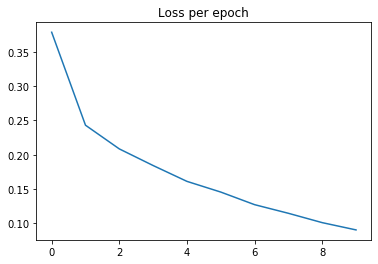

In [21]:
plt.plot(r.history['loss'], label = 'loss');
plt.title('Loss per epoch')

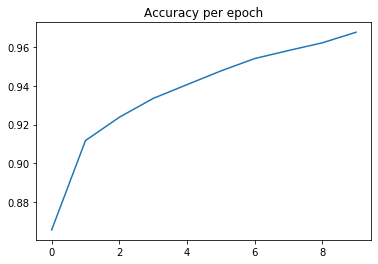

In [22]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.title('Accuracy per epoch');

# STEP #5: EVALUATE THE MODEL

In [23]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Accuracy', evaluation[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.2425 - accuracy: 0.9349
Accuracy 0.9348999857902527


**-----> We obtain a very good score at testing with an accuracy at 93% !  <---**

In [24]:
predicted_class = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [25]:
y_test = y_test.argmax(1)
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

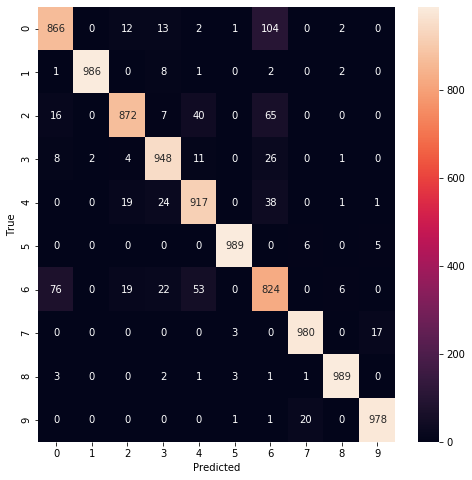

In [26]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize = (8,8))

cm = confusion_matrix(y_test, predicted_class)
sns.heatmap(cm, annot = True, fmt = 'd', color = 'white')

plt.xlabel('Predicted')
plt.ylabel('True');

It seems that the most confused classes are  : 
- 6 (Shirt) and 0 (T-shirt)
- 6 (Shirt) and 4 (Coat)
- 4 (Coat) and 2 (Pull-Over)

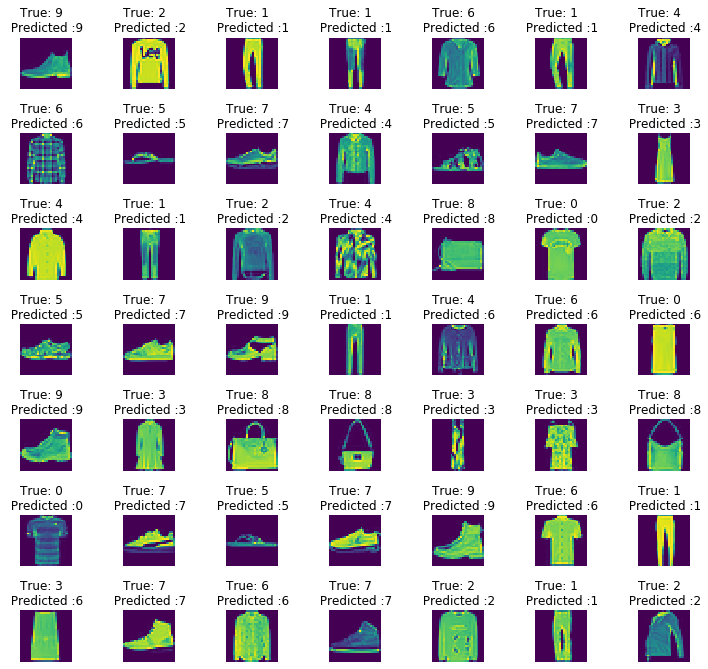

In [27]:
L_grid = 7
W_grid = 7

fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0 , L_grid * W_grid):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('True: {}  \n Predicted :{}'.format( y_test[i], predicted_class[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)


# STEP #6: IMPROVING THE MODEL WITH DATA AUGMENTATION

In [28]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

In [29]:
X_train, X_test = X_train.astype('float'), X_test.astype('float')

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_cat)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_cat)

In [30]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)

X_train : (60000, 28, 28, 1)
X_test :  (10000, 28, 28, 1)
y_train :  (60000, 10)
y_test :  (10000, 10)


In [31]:
n = 10
X_sample = X_train[:n]
print('X_sample :', X_sample.shape)

X_sample : (10, 28, 28, 1)


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,
                            height_shift_range = 0.1,
                             horizontal_flip = True,
                            vertical_flip = True)

In [37]:
datagen.fit(X_train)

cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 275s 147ms/step - loss: 0.3228 - accuracy: 0.8835
Epoch 2/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.3167 - accuracy: 0.8866
Epoch 3/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.3099 - accuracy: 0.8876
Epoch 4/10
1875/1875 [==============================] - 293s 156ms/step - loss: 0.3014 - accuracy: 0.8897
Epoch 5/10
1875/1875 [==============================] - 291s 155ms/step - loss: 0.2983 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 294s 157ms/step - loss: 0.2914 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 273s 146ms/step - loss: 0.2850 - accuracy: 0.8961
Epoch 8/10
1875/1875 [==============================] - 270s 144ms/step - loss: 0.2816 - accuracy: 0.8983
Epoch 9/10
1875/1875 [==============================] - 270s 144ms/step - loss: 0.2767 - accuracy: 0.8987
Epoch 10/10
1875/1875 [=======================

rotation_range = 40, height_shift_range = 0.1, horizontal_flip = True  --> 2 epochs  : 0.8559 on train, test_score = 0.8164

In [38]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Accuracy' , evaluation[1])


313/313 [==============================] - 6s 20ms/step - loss: 0.2551 - accuracy: 0.9069
Accuracy 0.9068999886512756


**With data augmentation, we got a lower score than the previous model. However the model with data augmentation is showing better results when it comes to overfitting, indeed testing score is higher than training score.**